<center><h1>Motivation</h1></center>

<p>A stroke is a medical condition in which poor blood flow to the brain causes cell death. Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. But, for this project, we want to create a model that could analyse if a certain type of patient has or not the chance of suffering a brain stroke. For that, we will split this project according to:</p>

<ol>
    <li>Importing libraries;</li>
    <li>Reading the dataset;</li>
    <li>Analysing the data:
        <ol>
            <li>Dtypes and null values;</li>
            <li>Transform object columns into binary columns;</li>
            <li>Understanding strokes causes;</li>
            <li>Searching for outliers:
                <ol>
                    <li>remove_outliers;</li>
                    <li>box_plot.</li>
                </ol>
            </li>
            <li>Visualising stroke cases;</li>
            <li>Spliting the dataset:
                <ol>
                    <li>splitting;</li>
                </ol>
            </li>
            <li>Solving the imbalanced problem:
                <ol>
                    <li>undersampling;</li>
                    <li>oversamping;</li>
                </ol>
            </li>
        </ol>
    </li>
    <li>Create a classification model:
        <ol>
            <li>Functions:
                <ol>
                    <li>train_model;</li>
                    <li>show_confusion_matrix;</li>
                    <li>show_scores;</li>
                </ol>
            </li>
            <li>Training;</li>
            <li>Evaluating the models;</li>
        </ol>
    </li>
    <li>Choosing the model;</li>
    <li>Saving the model;</li>
    <li>Conclusion.</li>
</ol>

<h2>1. Importing libraries:</h2>

In [82]:
#to read, clean and change data:
import pandas as pd

#to manipulate the data
import numpy as np

#to visualize the data:
import seaborn as sns
import matplotlib.pyplot as plt

#handle imbalanced data:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron

#to choose our future model:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

#to evaluate our future model:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score

#to export our future model:
import joblib

<h2>2. Reading the dataset:</h2>

<p>These are the columns descriptions:</p>


<table>
    <thead>
        <tr>
            <th>gender</th>
            <th>age</th>
            <th>hypertension</th>
            <th>heart_disease</th>
            <th>Ever-married</th>
            <th>work_type</th>
            <th>Residencetype</th>
            <th>avg</th>
            <th>BMI</th>
            <th>smoking_status</th>
            <th>stroke</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>"Male", "Female" or "Other"</td>
            <td>age of the patient</td>
            <td>0 if the patient doesn't have hypertension, 1 if the patient has hypertension</td>
            <td>0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</td>
            <td>"No" or "Yes"</td>
            <td>"children", "Govtjov", "Never worked", "Private" or "Self-employed"</td>
            <td>"Rural" or "Urban"</td>
            <td>glucose level: average glucose level in blood</td>
            <td>body mass index</td>
            <td>"formerly smoked", "never smoked", "smokes" or "Unknown"*</td>
            <td>1 if the patient had a stroke or 0 if not</td>
        </tr>
    </tbody>
</table>












In [32]:
path = r"./dataset/brain_stroke.csv"
dataset = pd.read_csv(path)

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<h2>3. Analysing and cleaning the data:</h2>

<h3>3.1 Dtypes and null values:</h3>

In [33]:
#Here, we can see that all columns types are numbers
#Luckly for us, according to each column description, this makes sense.
#But we cannot work in machine learning with columns that have string data for classification purposes.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


<h3>3.2 Transform object columns into binary columns:</h3>

In [34]:
#Therefore, we will use the pandas method pd.get_dummies() to transform the data into new binary columns
#For that, we have to transform the following columns:
columns_to_transform = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

dummy_dataset = pd.get_dummies(
    data = dataset[columns_to_transform],
    dtype=float
)

columns_to_mantain = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]

new_dataset = pd.concat(
    [
        dummy_dataset,
        dataset[columns_to_mantain]
    ],
    axis = 1
)

#Now, we have a dataset only full of numbers
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Female                   4981 non-null   float64
 1   gender_Male                     4981 non-null   float64
 2   ever_married_No                 4981 non-null   float64
 3   ever_married_Yes                4981 non-null   float64
 4   work_type_Govt_job              4981 non-null   float64
 5   work_type_Private               4981 non-null   float64
 6   work_type_Self-employed         4981 non-null   float64
 7   work_type_children              4981 non-null   float64
 8   Residence_type_Rural            4981 non-null   float64
 9   Residence_type_Urban            4981 non-null   float64
 10  smoking_status_Unknown          4981 non-null   float64
 11  smoking_status_formerly smoked  4981 non-null   float64
 12  smoking_status_never smoked     49

<h3>3.3 Understanding strokes causes:</h3>

<Axes: >

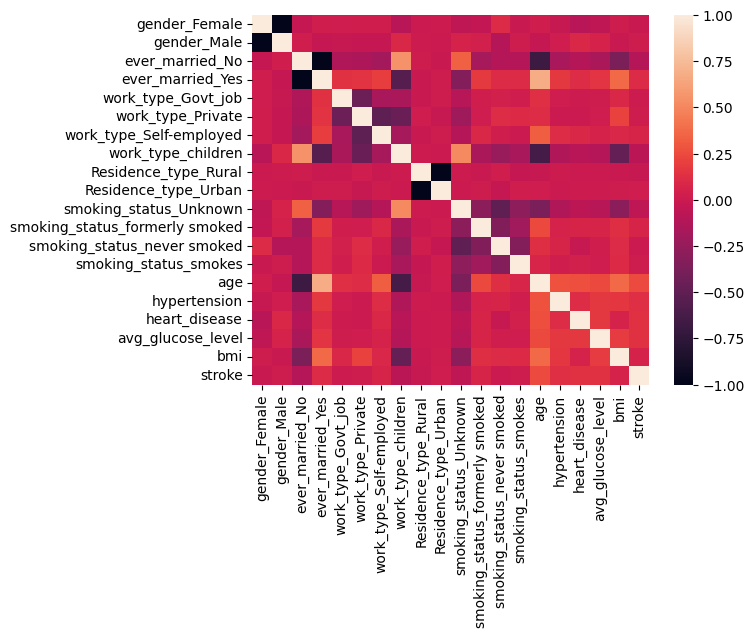

In [35]:
#This is the overall correlation bettwen those columns:
sns.heatmap(new_dataset.corr())

In [36]:
#As you can see, the columns with more stroke correlations are:
pd.DataFrame(
    new_dataset.corr()["stroke"].sort_values(ascending = False)
)

,stroke
stroke,1.000000
age,0.246478
heart_disease,0.134610
avg_glucose_level,0.133227
hypertension,0.131965
ever_married_Yes,0.108398
smoking_status_formerly smoked,0.065320
work_type_Self-employed,0.062643
bmi,0.056926
Residence_type_Urban,0.016494


<h3>3.4 Searching for outliers:</h3>

<p>We understand that machine learning algorithms may have some trouble with outliers. For that, we need to check if there are columns that have outliers values and eliminate then. Thus, here are some functions:</p>

<h4>3.4.A remove_outliers:</h4>

In [37]:
#Here, we filter the dataset to eliminate outiliers based on a certain column:
def remove_outliers(dataset, column):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)

    gap = q3 - q1

    return dataset[
        (dataset[column] >= gap - 1.5*q1) & 
        (dataset[column] <= gap + 1.5*q3)
    ]

<h4>3.4.B box_plot:</h4>

In [38]:
#Here, we are creating a box plot visualization to compare outliers in our dataset:
def box_plot(array_outliers, array_cleaned, column, title):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    colors = ["red", "green"]

    # First boxplot
    bplot1 = ax1.boxplot([array_outliers], positions=[1], patch_artist=True)
    ax1.set_ylabel(f"{column} (with outliers)", color="red")
    ax1.tick_params(axis="y", labelcolor="red")
    
    # Set first boxplot color
    for patch in bplot1['boxes']:
        patch.set_facecolor(colors[0])

    # Second boxplot
    bplot2 = ax2.boxplot([array_cleaned], positions=[2], patch_artist=True)
    ax2.set_ylabel(f"{column} (without outliers)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")
    
    # Set second boxplot color
    for patch in bplot2['boxes']:
        patch.set_facecolor(colors[1])

    # General settings
    plt.xticks([1, 2], ["With Outliers", "Without Outliers"])
    plt.title(title)
    plt.tight_layout()
    plt.show()


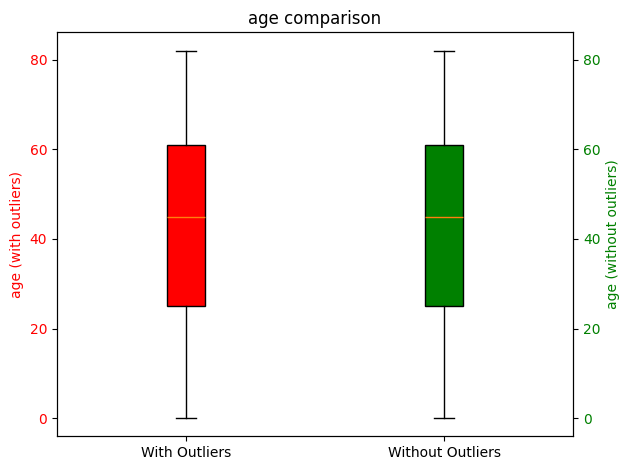

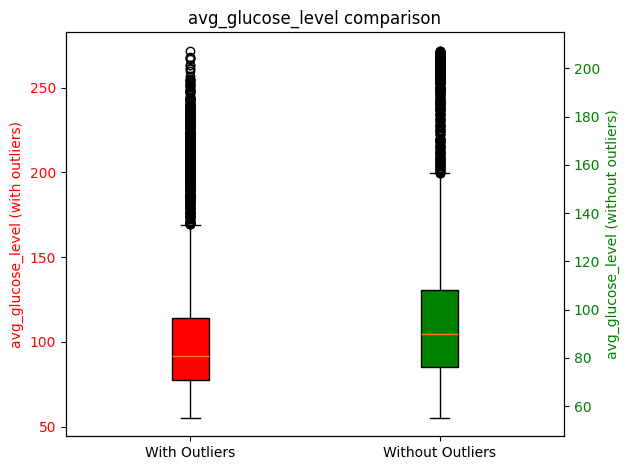

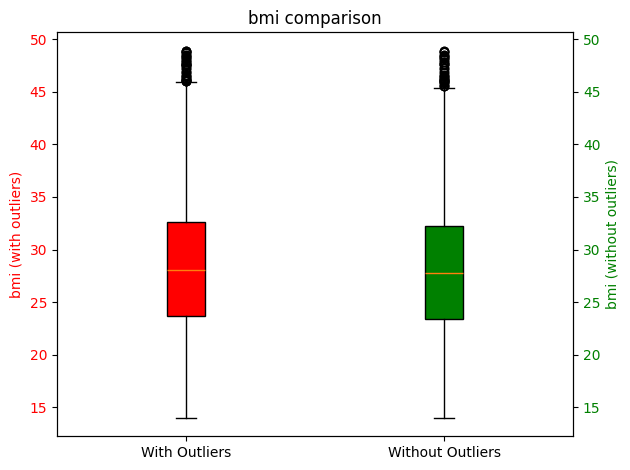

In [39]:
#These are the columns to verify outliers:
columns_to_verify = ["age", "avg_glucose_level", "bmi"]

cleaned_dataset = new_dataset

for column in columns_to_verify:

    cleaned_dataset = remove_outliers(cleaned_dataset, column)

    box_plot(
        new_dataset[column],
        cleaned_dataset[column],
        column,
        f"{column} comparison"
    )

new_dataset = cleaned_dataset

<h3>3.5 Visualising stroke cases:</h3>

<p>Before we could create our model, there is a problem that is very important to be solve: the dataset is <strong>imbalanced</strong>.</p>

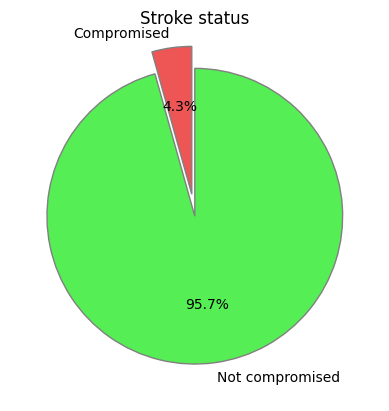

In [40]:
# For that, let's show a pie chart:
sizes = [
    new_dataset[new_dataset["stroke"] == 1].shape[0],
    new_dataset[new_dataset["stroke"] == 0].shape[0]
]

labels = ['Compromised', 'Not compromised']
colors = ['#ee5555', '#55ee55']

plt.figure()
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',
    colors=colors, 
    startangle=90,
    wedgeprops={'edgecolor': 'gray'},
    explode=[0.15, 0]
)

plt.title('Stroke status')
plt.show()


<h3>3.6 Spliting the dataset:</h3>

<p>Before we solve the imbalanced problem, we need to split the new dataset into a training and test part. For that, for pratice purposes, we are going to create another function:</p>

<h4>3.6.A splitting:</h4>

In [41]:
def spliting(target_column, train_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(
        new_dataset.drop([target_column], axis=1),
        new_dataset[target_column],
        train_size = train_size,
        random_state = random_state
    )

    return X_train, X_test, y_train, y_test

<h3>3.7 Solving the imbalanced problem:</h3>

<p>Here, we will use two differents functions to solve the same problem:</p>

<h4>3.7.A undersampling:</h4>

<p>Undersampling is a technique to reduce our majority cases in order to increase the importance of another class.</p>

In [42]:
#Here, we will save the new train split dataset after the undersampling
def undersampling(X_train, y_train, random_state):
    rus = RandomUnderSampler(random_state=random_state, sampling_strategy = 'majority')
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

    return X_train_undersampled, y_train_undersampled

<h4>3.7.B oversampling:</h4>

<p>In the other hand, oversampling is another technique to increase the importance of a minority class by increasing your frequency in the dataset.</p>

In [43]:
#Here, we will save the new train split dataset after the oversampling
def oversamping(X_train, y_train):
    smote = SMOTE()
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

    return X_train_oversampled, y_train_oversampled

<h2>4. Build a regression model:</h2>

<p>Here, we will test 3 differents regression models:</p>

<ol>
    <li>Perceptor;</li>
    <li>ExtraTreesClassifier;</li>
    <li>RandomForestClassifier</li>
</ol>

<p>For that, we will create this functions:</p>

<ol>
    <li><code>train_model</code>;</li>
    <li><code>show_confusion_matrix</code></li>
    <li><code>print_scores</code></li>
</ol>

<h3>4.1 Functions:</h3>

<h4>4.1.A train_model:</h4>

In [44]:
#this function will train a specific model and return the model after the training section
def train_model(model_name, X_train, y_train):
    model = model_name()

    model.fit(
        X = X_train,
        y = y_train
    )

    return model

<h4>4.1.B show_confusion_matrix:</h4>

In [45]:
#this function serves only to show us a confusion matrix plot
def show_confusion_matrix(model, X_test, y_test, title):

    model_results = model.predict(X_test)

    confusion_matrix_plot = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(
            y_pred = model_results,
            y_true = y_test
        ),
        display_labels = [0, 1]
    )

    confusion_matrix_plot.plot()
    plt.title(title)
    plt.show()

<h4>4.1.C show_scores:</h4>

In [46]:
#this function store the scores of a model in a dataframe
def show_scores(X_test, y_test, model, model_name, random_state, index):

    f1_score_value = f1_score(y_test, model.predict(X_test))
    recall_score_value = recall_score(y_test, model.predict(X_test))

    return pd.DataFrame(
        {
            f"f1_score": f1_score_value,
            f"recall_score": recall_score_value,
            f"random_state": random_state,
            f"index": index,
        },
        index = [model_name]
    )

<h3>4.2 Training:</h3>

<p>To make sure that our test is honest, let's train the same models at least 50 times. For each case, we will change the random_state. We are also going to reuse the functions already created.</p>

In [47]:
models_trained = []

for random_state in range (0, 50):

    X_train, X_test, y_train, y_test = spliting("stroke", 0.7, random_state)

    X_train_oversampled, y_train_oversampled = oversamping(X_train, y_train)
    X_train_undersampled, y_train_undersampled = oversamping(X_train, y_train)

    #In order to make our code more clear, we will iterate a list in our training section
    models = [
        {
            "model": Perceptron,
            "model_name": "Perceptror oversampled",
            "X_train": X_train_oversampled,
            "y_train": y_train_oversampled,
        },
        {
            "model": ExtraTreesClassifier,
            "model_name": "ExtraTreesClassifier oversampled",
            "X_train": X_train_oversampled,
            "y_train": y_train_oversampled,
        },
        {
            "model": RandomForestClassifier,
            "model_name": "RandomForestClassifier oversampled",
            "X_train": X_train_oversampled,
            "y_train": y_train_oversampled,
        },
        {
            "model": Perceptron,
            "model_name": "Perceptror undersampled",
            "X_train": X_train_undersampled,
            "y_train": y_train_undersampled,
        },
        {
            "model": ExtraTreesClassifier,
            "model_name": "ExtraTreesClassifier undersampled",
            "X_train": X_train_undersampled,
            "y_train": y_train_undersampled,
        },
        {
            "model": RandomForestClassifier,
            "model_name": "RandomForestClassifier undersampled",
            "X_train": X_train_undersampled,
            "y_train": y_train_undersampled,
        }
    ]

    #Training various models:
    for model in models:
        models_trained.append(
            {
                "model": train_model(
                    model["model"],
                    model["X_train"],
                    model["y_train"]
                ),
                "model_name": model["model_name"],
                "X_train": X_train_undersampled,
                "y_train": y_train_undersampled,
                "random_state": random_state,
            }
        )

<h3>4.3 Evaluating the models:</h3>

In [48]:
scores = pd.DataFrame()

#Create a dataframe to store the results for each model:
for i, model in enumerate(models_trained):

    scores = pd.concat(
        [
            show_scores(X_test, y_test, model["model"], model["model_name"], model["random_state"], i),
            scores
        ]
    )

scores = scores.sort_values(["f1_score", "recall_score"], ascending = False)

scores

,f1_score,recall_score,random_state,index
RandomForestClassifier oversampled,0.900901,0.819672,6,38
ExtraTreesClassifier oversampled,0.886957,0.836066,6,37
RandomForestClassifier undersampled,0.882883,0.803279,6,41
RandomForestClassifier undersampled,0.875000,0.803279,19,119
RandomForestClassifier oversampled,0.875000,0.803279,19,116
...,...,...,...,...
Perceptror oversampled,0.028571,0.016393,14,84
RandomForestClassifier undersampled,0.027397,0.016393,49,299
Perceptror oversampled,0.000000,0.000000,39,234
Perceptror oversampled,0.000000,0.000000,35,210


<h2>5. Choosing the model:</h2>

<p>Here, we are going to plot the confusion matrix for the first 10 results, just to check if one of those models are better to detect a brain stroke. That is very important because we want to not only create a model with the best result, but we also need that this same model has the ability to find more stroke brain cases.</p>

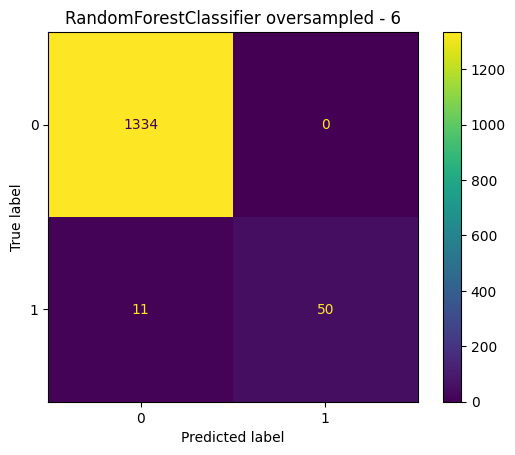

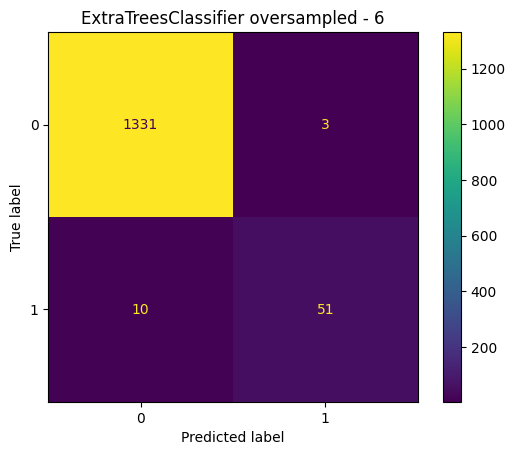

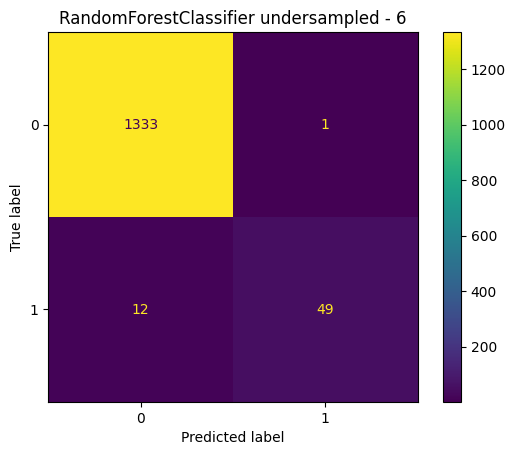

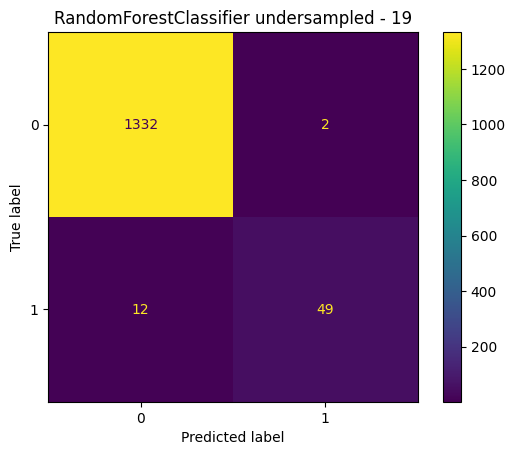

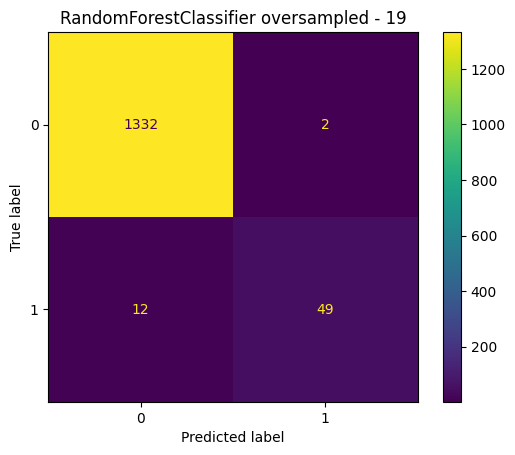

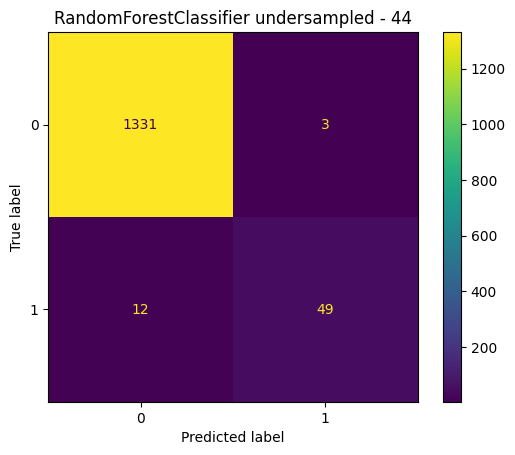

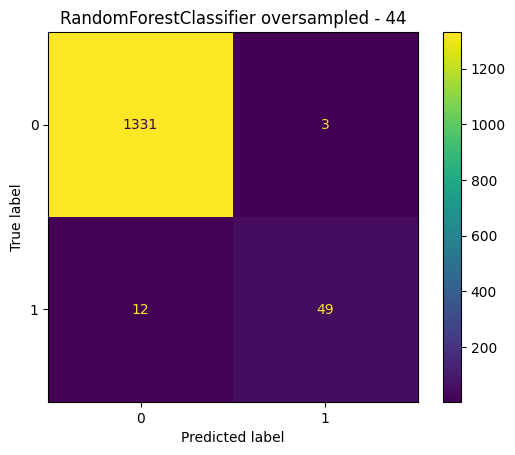

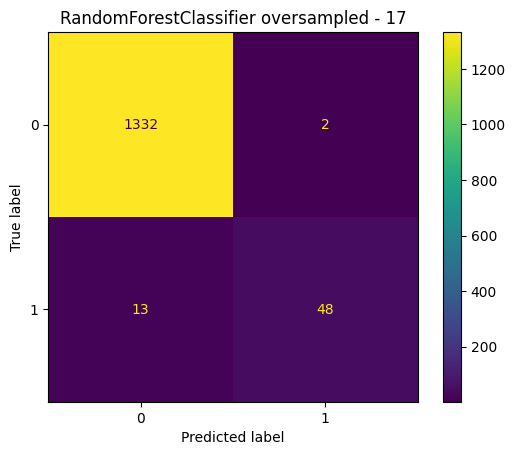

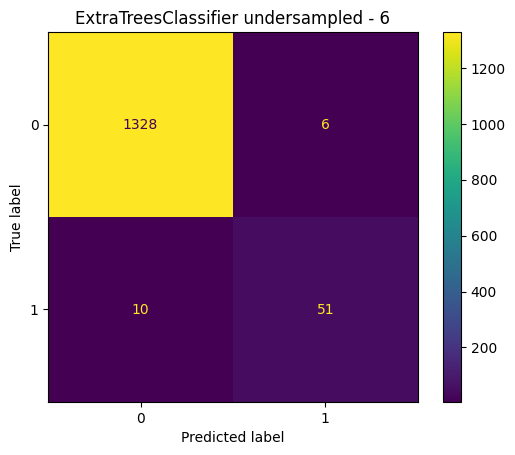

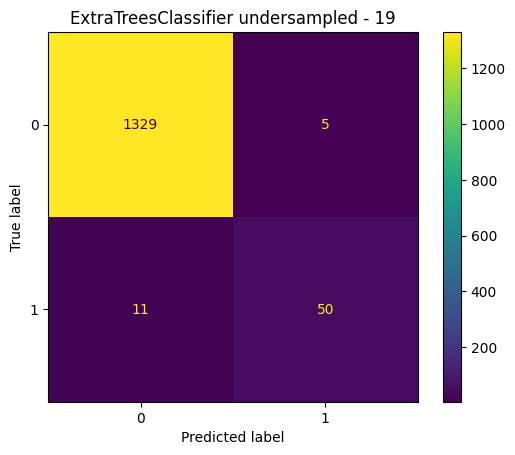

In [49]:
for row in range(0, 10):

    score_index = scores.iloc[row, 3]

    show_confusion_matrix(
        model = models_trained[score_index]["model"],
        X_test = X_test,
        y_test = y_test,
        title = f'{scores[scores["index"] == score_index].index[0]} - {models_trained[score_index]["random_state"]}'
    )

<h2>6. Saving the model:</h2>

<p>Looking the confusion matrix, it is very clear that the best model is the ExtraTreesClassifier oversampled when the random state is 6. Thus, we are going to export this model in order to reuse it whenever we want:</p>

In [76]:
row = 1

score_index = scores.iloc[row, 3]

joblib.dump(
    value = models_trained[score_index]["model"],
    filename = "brain_stroke_model.joblib"
)

['brain_stroke_model.joblib']

<h2>Conclusion:</h2>

<p>As we can see, when <code>random_state = 6</code>, ExtraTreesClassifier undersampled is the model that we have chosen as the better one. This model can detect:</p>

<ol>
    <li>brain strokes cases with accuracy: 83.61%,</li>
    <li>false brain strokes with accuracy: 99.78%</li>
</ol>

<p>It is very important to understand that, because the dataset in imbalanced, the accuracy to detect false brain strokes acusations is a lot bigger than detect real strokes cases, which is a minority. In this project, let's just focus on the <b>83.61%</b> as the main result because that is exactly what we want to detect: and that is very good for a real model.</p>

<p>However, what are the implications for a model like this? If patients can access results trought this machine learning model, it will become very easy and fast to find future brain strokes cases. As a result, we could finally decrease real strokes cases or even stay more alert against this problem in our surroundings, if we know our friends stroke conditions. A brain stroke is caused mainly because our habits and, therefore, the model's result can truly change some routines around the globe if we know about this risk with antecipation.</p>

In [89]:
results = confusion_matrix(y_test, models_trained[score_index]["model"].predict(X_test))

print(f"""
This model can detect:
    1) Brain strokes cases with accuracy: {np.round(100*results[1][1]/(results[1][0] + results[1][1]), 2)}%,
    2) False brain strokes with accuracy: {np.round(100*results[0][0]/(results[0][0] + results[0][1]), 2)}%
""")


This model can detect:
    1) Brain strokes cases with accuracy: 83.61%,
    2) False brain strokes with accuracy: 99.78%

